In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
def create_simple_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [14]:
def create_vgg16_cnn():
    model = models.Sequential()

    # First Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Second Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Third Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Fourth Block
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Fifth Block (No pooling, just convolutions)
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


In [10]:
def create_resnet_cnn():
    inputs = layers.Input(shape=(32, 32, 3))

    # Initial Conv Layer
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Residual Block 1
    shortcut = x
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.add([x, shortcut])

    # Pooling Layer with downsampling
    x = layers.MaxPooling2D((2, 2))(x)
    shortcut = layers.MaxPooling2D((2, 2))(shortcut)  # Downsample shortcut to match dimensions

    # Residual Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    shortcut = layers.Conv2D(128, (1, 1), activation='relu', padding='same')(shortcut)  # Adjust shortcut to match new filter size
    x = layers.add([x, shortcut])

    # Pooling Layer
    x = layers.MaxPooling2D((2, 2))(x)

    # Flatten and Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model


In [15]:
def compile_and_train(model, train_images, train_labels, test_images, test_labels):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels), batch_size=64)
    return history

simple_cnn = create_simple_cnn()
vgg16_cnn = create_vgg16_cnn()
vgg16_history = compile_and_train(vgg16_cnn, train_images, train_labels, test_images, test_labels)



resnet_cnn = create_resnet_cnn()
resnet_history = compile_and_train(resnet_cnn, train_images, train_labels, test_images, test_labels)


simple_history = compile_and_train(simple_cnn, train_images, train_labels, test_images, test_labels)



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.0989 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.0965 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.0993 - loss: 2.3027 - 

Simple CNN Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7067 - loss: 0.8699
Test accuracy: 0.7026
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.91      0.74      0.82      1000
           2       0.53      0.67      0.59      1000
           3       0.56      0.48      0.52      1000
           4       0.65      0.66      0.66      1000
           5       0.64      0.59      0.61      1000
           6       0.69      0.83      0.76      1000
           7       0.81      0.70      0.75      1000
           8       0.77      0.85      0.81      1000
           9       0.81      0.77      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



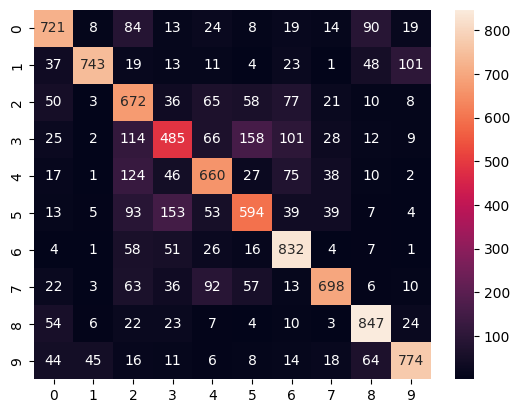

VGG16 CNN Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0987 - loss: 2.3026
Test accuracy: 0.1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


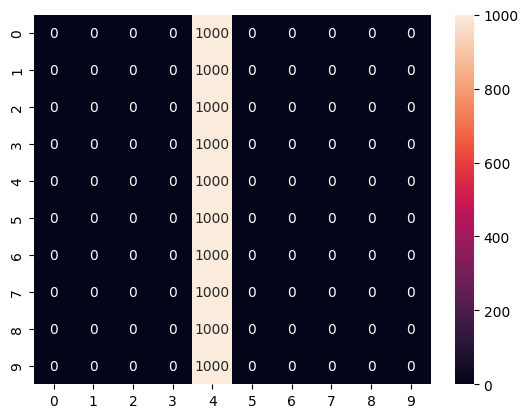

ResNet CNN Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7414 - loss: 1.1715
Test accuracy: 0.7411
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.81      0.77      1000
           1       0.88      0.85      0.87      1000
           2       0.60      0.66      0.63      1000
           3       0.58      0.51      0.54      1000
           4       0.72      0.68      0.70      1000
           5       0.65      0.61      0.63      1000
           6       0.77      0.83      0.80      1000
           7       0.80      0.78      0.79      1000
           8       0.85      0.83      0.84      1000
           9       0.82      0.85      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



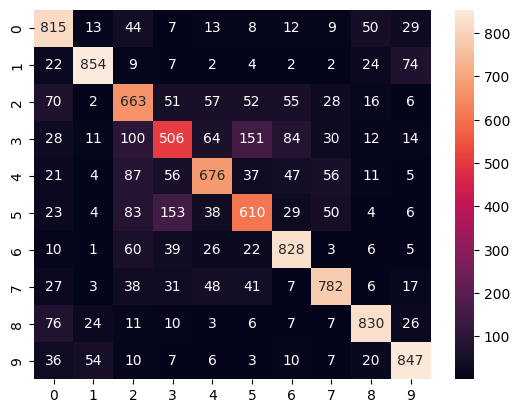

In [16]:
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test accuracy: {test_acc:.4f}')
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(test_labels, axis=1)

    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

print("Simple CNN Evaluation:")
evaluate_model(simple_cnn, test_images, test_labels)

print("VGG16 CNN Evaluation:")
evaluate_model(vgg16_cnn, test_images, test_labels)

print("ResNet CNN Evaluation:")
evaluate_model(resnet_cnn, test_images, test_labels)


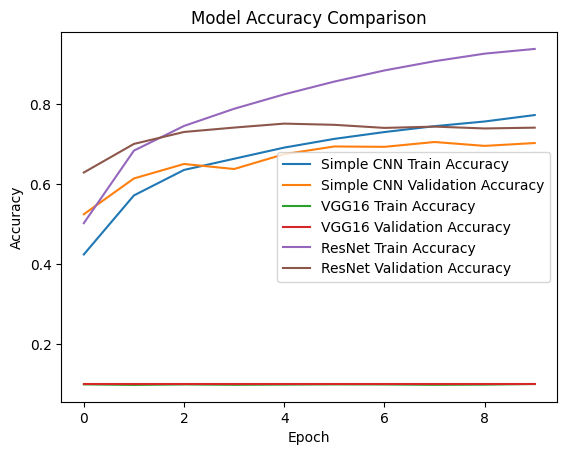

In [17]:
def plot_history(histories, titles):
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{titles[i]} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{titles[i]} Validation Accuracy')

    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_history([simple_history, vgg16_history, resnet_history], ['Simple CNN', 'VGG16', 'ResNet'])
